# Import des librairies et des données


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('Data/houses_Madrid.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

## Palette de couleurs

In [3]:
palette = sns.color_palette("rocket")

darker = palette[0]
dark = palette[1]
medium = palette[2]
redish = palette[3]
light = palette[4]
lighter = palette[5]

colors = ['green' if (i == 0 and j == 0) or (i == 1 and j == 1) else 'red' for i in range(2) for j in range(2)]
cmap_cm = ListedColormap(colors)

sns.set_style('darkgrid')

cmap = sns.color_palette("rocket", as_cmap=True)

## Analyse des données

In [4]:
numberOfRowsBefore = df.shape[0]
numberOfColumnsBefore = df.shape[1]
print(f"Le dataset contient {numberOfRowsBefore} lignes et {numberOfColumnsBefore} colonnes.")

Le dataset contient 21742 lignes et 58 colonnes.


In [5]:
df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


In [6]:
# show null graph
def show_missing_data(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap=cmap, yticklabels=False)
    plt.title('Données manquantes dans le dataset')
    plt.show()

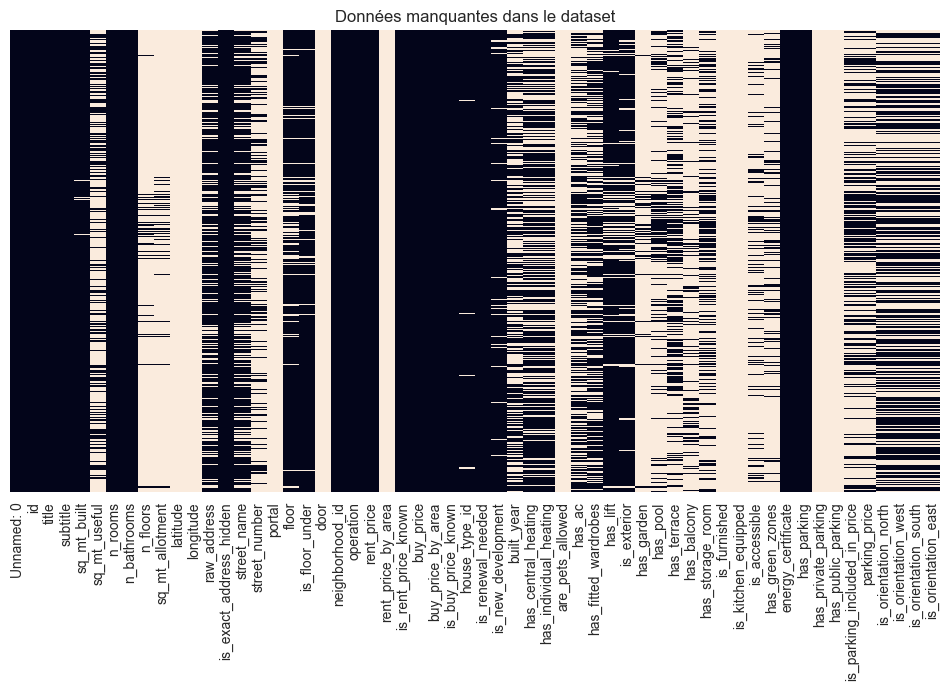

In [7]:
show_missing_data(df)

In [8]:
# if a column has more than 75% of missing values, we drop it
threshold = 0.70
df = df.loc[:, df.isnull().mean() < threshold]

numberOfRowsAfter = df.shape[0]
numberOfColumnsAfter = df.shape[1]
print(f"Nous avons supprimé {numberOfRowsBefore - numberOfRowsAfter} lignes.")
print(f"Nous avons supprimé {numberOfColumnsBefore - numberOfColumnsAfter} colonnes.")
print(f"Le dataset contient maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Nous avons supprimé 0 lignes.
Nous avons supprimé 29 colonnes.
Le dataset contient maintenant 21742 lignes et 40 colonnes.


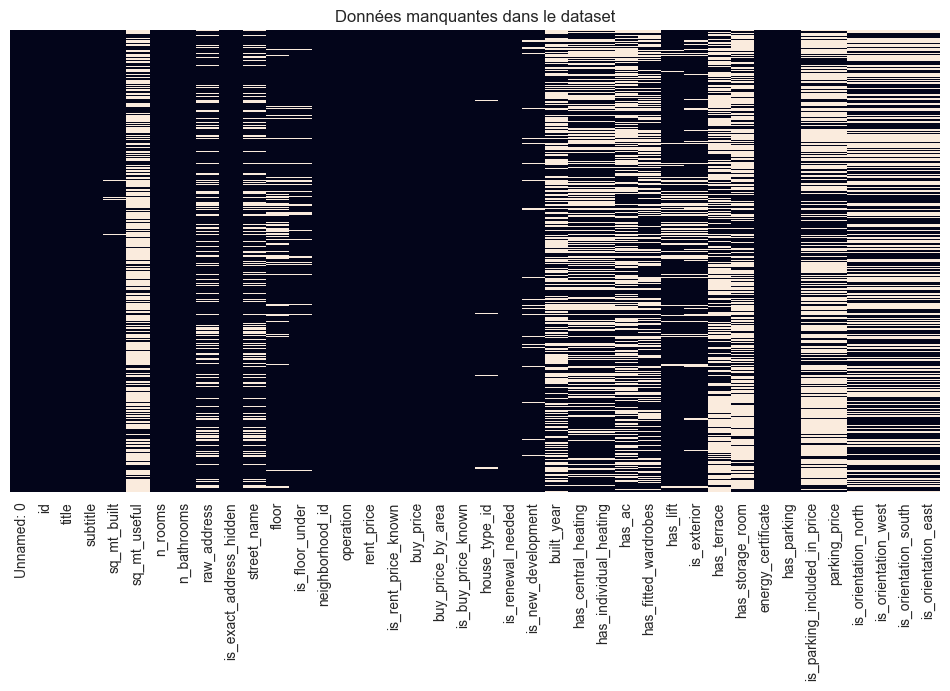

In [9]:
show_missing_data(df)

In [10]:
numberOfRowsBefore = df.shape[0]
numberOfColumnsBefore = df.shape[1]

df = df.drop(columns=['is_parking_included_in_price', 'parking_price', 'is_orientation_north', 'is_orientation_south', 'is_orientation_east', 'is_orientation_west'])

In [11]:
numberOfRowsAfter = df.shape[0]
numberOfColumnsAfter = df.shape[1]

print(f"Nous avons supprimé {numberOfRowsBefore - numberOfRowsAfter} lignes.")
print(f"Nous avons supprimé {numberOfColumnsBefore - numberOfColumnsAfter} colonnes.")
print(f"Le dataset contient maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Nous avons supprimé 0 lignes.
Nous avons supprimé 23 colonnes.
Le dataset contient maintenant 21742 lignes et 34 colonnes.


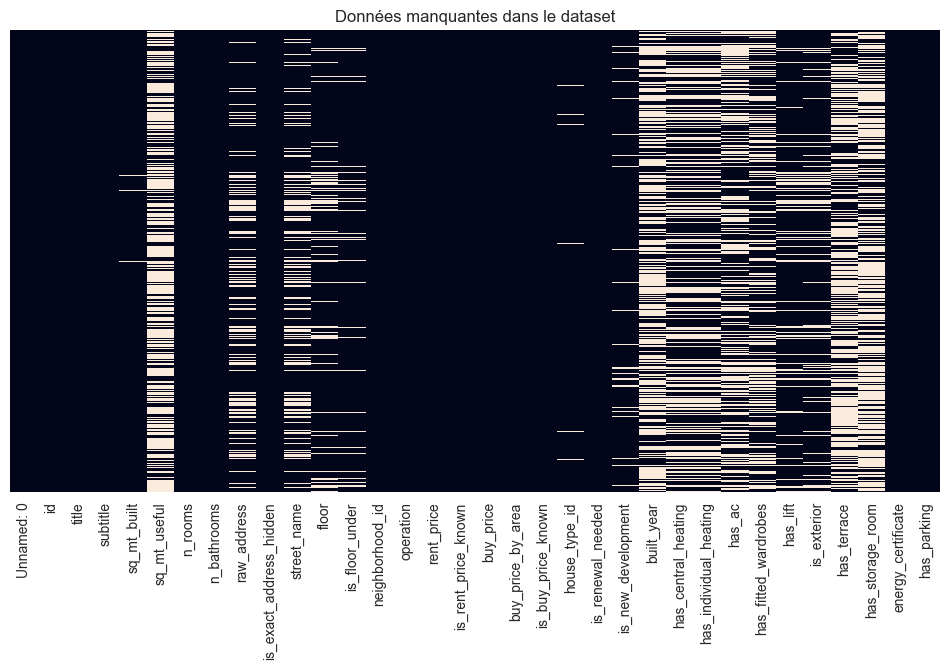

In [12]:
show_missing_data(df)

In [13]:
numberOfRowsBefore = df.shape[0]
numberOfColumnsBefore = df.shape[1]

df = df.drop(columns=['sq_mt_useful', 'raw_address', 'street_name', 'Unnamed: 0'])

In [14]:
numberOfRowsAfter = df.shape[0]
numberOfColumnsAfter = df.shape[1]

print(f"Nous avons supprimé {numberOfRowsBefore - numberOfRowsAfter} lignes.")
print(f"Nous avons supprimé {numberOfColumnsBefore - numberOfColumnsAfter} colonnes.")
print(f"Le dataset contient maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Nous avons supprimé 0 lignes.
Nous avons supprimé 19 colonnes.
Le dataset contient maintenant 21742 lignes et 30 colonnes.


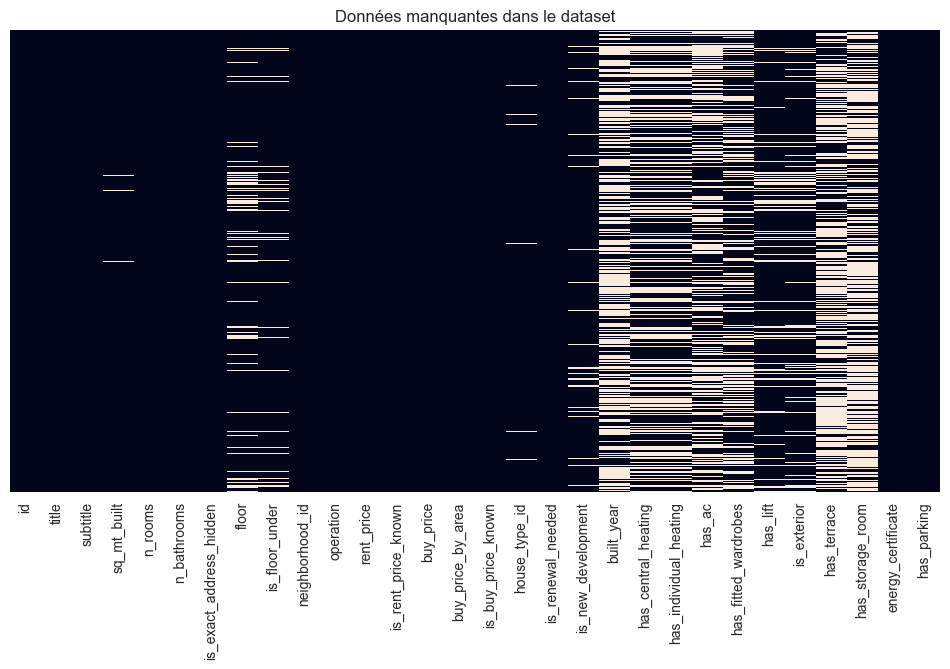

In [15]:
show_missing_data(df)

In [16]:
numberOfRowsBefore = df.shape[0]
numberOfColumnsBefore = df.shape[1]

df = df.drop_duplicates()

In [17]:
numberOfRowsAfter = df.shape[0]
numberOfColumnsAfter = df.shape[1]

print(f"Nous avons supprimé {numberOfRowsBefore - numberOfRowsAfter} lignes.")
print(f"Nous avons supprimé {numberOfColumnsBefore - numberOfColumnsAfter} colonnes.")
print(f"Le dataset contient maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Nous avons supprimé 0 lignes.
Nous avons supprimé 19 colonnes.
Le dataset contient maintenant 21742 lignes et 30 colonnes.


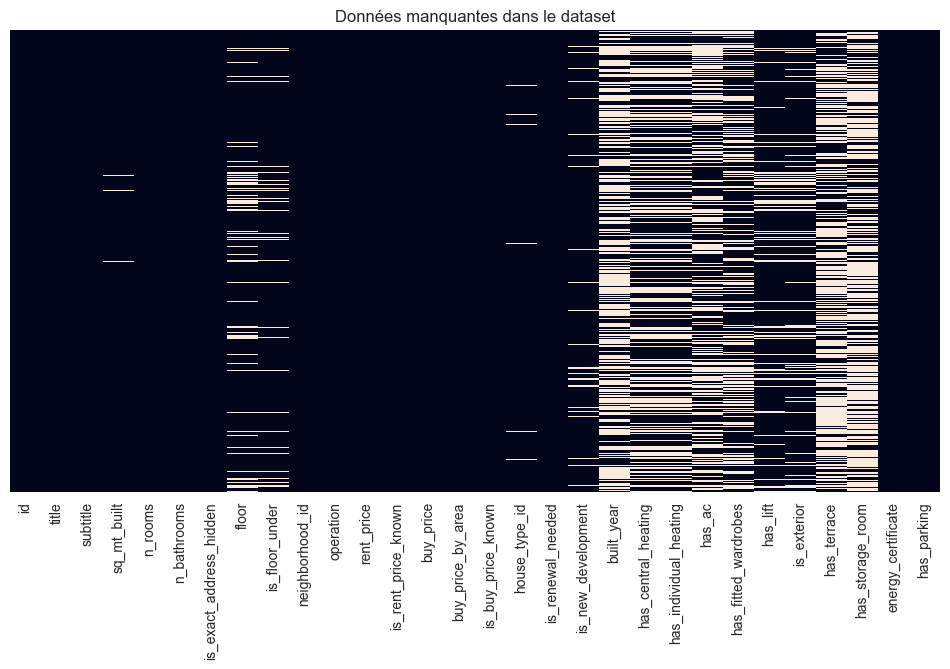

In [18]:
show_missing_data(df)